# Image classification  on cifar10 dataset using CNN

In [1]:
import keras

In [2]:
from keras.datasets import cifar10

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [4]:
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
(X_train,y_train), (X_test,y_test)=cifar10.load_data()

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_train=y_train.reshape(-1,)

In [12]:
y_train.shape

(50000,)

In [13]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

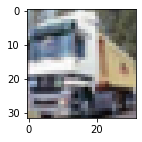

In [14]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [15]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [16]:
#since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [17]:
# one hot encode outputs
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [18]:
#finding number of target classes
num_classes=y_test.shape[1]

In [19]:
num_classes

10

In [20]:
#defining the cnn model
def convolutional_model():
    model=Sequential()
    model.add(Conv2D(32,(5,5), strides=(1,1), activation="relu", input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Conv2D(16, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Flatten())
    
    model.add(Dense(70,activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [21]:
#buliding a cnn model
model=convolutional_model()

In [22]:
#fitting the cnn model
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10, verbose=2)

Epoch 1/10
1563/1563 - 42s - loss: 1.5748 - accuracy: 0.4287 - val_loss: 1.3134 - val_accuracy: 0.5316
Epoch 2/10
1563/1563 - 41s - loss: 1.2457 - accuracy: 0.5579 - val_loss: 1.1649 - val_accuracy: 0.5918
Epoch 3/10
1563/1563 - 41s - loss: 1.1115 - accuracy: 0.6100 - val_loss: 1.1171 - val_accuracy: 0.6133
Epoch 4/10
1563/1563 - 41s - loss: 1.0300 - accuracy: 0.6383 - val_loss: 1.0913 - val_accuracy: 0.6244
Epoch 5/10
1563/1563 - 41s - loss: 0.9674 - accuracy: 0.6596 - val_loss: 1.0440 - val_accuracy: 0.6363
Epoch 6/10
1563/1563 - 42s - loss: 0.9195 - accuracy: 0.6764 - val_loss: 1.0157 - val_accuracy: 0.6514
Epoch 7/10
1563/1563 - 42s - loss: 0.8837 - accuracy: 0.6914 - val_loss: 1.0078 - val_accuracy: 0.6550
Epoch 8/10
1563/1563 - 43s - loss: 0.8452 - accuracy: 0.7037 - val_loss: 0.9950 - val_accuracy: 0.6609
Epoch 9/10
1563/1563 - 63s - loss: 0.8152 - accuracy: 0.7135 - val_loss: 0.9922 - val_accuracy: 0.6591
Epoch 10/10
1563/1563 - 44s - loss: 0.7877 - accuracy: 0.7223 - val_loss:

In [23]:
scores=model.evaluate(X_test,y_test, verbose=0)
accuracy=scores[1]
error=1-accuracy


In [24]:
print("accuracy:{} \n error:{}".format(accuracy,error))

accuracy:0.6633999943733215 
 error:0.33660000562667847


In [40]:
#finding the predicted output for X_train dataset
y_pred=model.predict(X_test)

In [41]:
y_pred

array([[9.55117517e-04, 2.00467557e-03, 1.29180765e-02, ...,
        1.09175674e-03, 1.69470478e-02, 1.41171011e-04],
       [1.33318216e-01, 4.93669868e-01, 2.94314494e-04, ...,
        1.00713960e-05, 1.48446262e-01, 2.23288208e-01],
       [2.01590776e-01, 8.14777762e-02, 5.72009198e-03, ...,
        1.98434549e-03, 6.49978876e-01, 3.59236822e-02],
       ...,
       [7.56805472e-04, 2.88529427e-05, 3.59494686e-02, ...,
        3.09930765e-03, 3.34385404e-05, 2.56642816e-04],
       [1.91030651e-01, 1.84732780e-01, 1.79157089e-02, ...,
        2.47368379e-03, 1.21347397e-03, 3.13787896e-05],
       [3.90054902e-06, 1.05144274e-04, 1.63961900e-04, ...,
        9.92683709e-01, 3.81618378e-07, 2.17470097e-05]], dtype=float32)

In [42]:
y_pred.shape

(10000, 10)

In [43]:
#representing the predicted output as well as y_test values in decimal form
y_pred_decimal=np.argmax(y_pred, axis=1)
y_test_decimal=np.argmax(y_test, axis=1)

In [44]:
y_pred_decimal

array([3, 1, 8, ..., 5, 4, 7], dtype=int64)

In [80]:
y_test_decimal

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [45]:
type(y_pred_decimal)

numpy.ndarray

In [46]:
type(y_test_decimal)

numpy.ndarray

In [47]:
y_pred_decimal.shape

(10000,)

In [48]:
y_test_decimal.shape

(10000,)

In [49]:
#finding the number of correct predictions and number of incorrect predictions
correct_predictions=(y_pred_decimal==y_test_decimal).sum()
incorrect_predictions=(y_pred_decimal!=y_test_decimal).sum()

In [50]:
correct_predictions

6634

In [51]:
incorrect_predictions

3366

In [52]:
#finding the indices of incorrect as well as correct predictions
indices_incorrect_pred=np.where(y_pred_decimal!=y_test_decimal)[0]
indices_correct_pred=np.where(y_pred_decimal==y_test_decimal)[0]

In [53]:
indices_incorrect_pred

array([   1,    4,    7, ..., 9994, 9996, 9998], dtype=int64)

In [54]:
indices_correct_pred

array([   0,    2,    3, ..., 9995, 9997, 9999], dtype=int64)

In [66]:
labels=['airplane','automobile','bird','cat', 'deer','dog','frog','horse','ship','truck']

def show_img(data,index):
    plt.figure(figsize=(14,2))
    plt.imshow(data)
    plt.xlabel(labels[index])
    

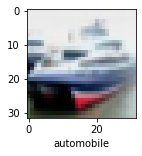

In [76]:
#finding predicted label for the first incorrectly predicted image in X_test
show_img(X_test[indices_incorrect_pred[0]],y_pred_decimal[indices_incorrect_pred[0]])

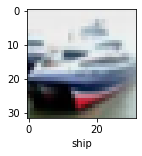

In [77]:
#finding correct label for the first incorrectly predicted image in X_test
show_img(X_test[indices_incorrect_pred[0]],y_test_decimal[indices_incorrect_pred[0]])

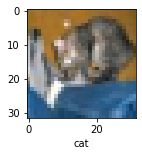

In [78]:
#finding predicted label for the first correctly predicted image in X_test
show_img(X_test[indices_correct_pred[0]],y_pred_decimal[indices_correct_pred[0]])

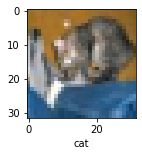

In [79]:
#finding correct label for the first incorrectly predicted image in X_test
show_img(X_test[indices_correct_pred[0]],y_test_decimal[indices_correct_pred[0]])